# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [30]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

from sqlalchemy import create_engine
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download(['punkt', 'wordnet','stopwords'])
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
# merge datasets
df = pd.merge(messages,categories, on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [5]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(';', expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [6]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing

category_colnames = row.apply(lambda x: x[:-2])
print(category_colnames)


0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [7]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [8]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
categories.dtypes

0
related                   int64
request                   int64
offer                     int64
aid_related               int64
medical_help              int64
medical_products          int64
search_and_rescue         int64
security                  int64
military                  int64
child_alone               int64
water                     int64
food                      int64
shelter                   int64
clothing                  int64
money                     int64
missing_people            int64
refugees                  int64
death                     int64
other_aid                 int64
infrastructure_related    int64
transport                 int64
buildings                 int64
electricity               int64
tools                     int64
hospitals                 int64
shops                     int64
aid_centers               int64
other_infrastructure      int64
weather_related           int64
floods                    int64
storm                     int64
fire  

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [10]:
# drop the original categories column from `df`
df.drop(['categories'],axis=1, inplace = True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [11]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df,categories], axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [12]:
# check duplicates
df[df.duplicated() == True]

# check number of duplicates
df.duplicated(subset=['id']).sum()

206

In [13]:
# drop duplicates
df.drop_duplicates(subset=['id'],keep='first', inplace=True)

In [14]:
# check number of duplicates
print(df.duplicated(subset=['id']).sum())
print(df.duplicated().sum())

0
0


### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [15]:
engine = create_engine('sqlite:///messages.db')
df.to_sql('messages', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

In [16]:
df.head(20)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#Print shape
print(df.shape)

#Check missing values 
df.isnull().sum()

(26180, 40)


id                            0
message                       0
original                  16027
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [18]:
# Check if all categories are binary
df.iloc[:,4:].nunique() 

related                   3
request                   2
offer                     2
aid_related               2
medical_help              2
medical_products          2
search_and_rescue         2
security                  2
military                  2
child_alone               1
water                     2
food                      2
shelter                   2
clothing                  2
money                     2
missing_people            2
refugees                  2
death                     2
other_aid                 2
infrastructure_related    2
transport                 2
buildings                 2
electricity               2
tools                     2
hospitals                 2
shops                     2
aid_centers               2
other_infrastructure      2
weather_related           2
floods                    2
storm                     2
fire                      2
earthquake                2
cold                      2
other_weather             2
direct_report       

In [19]:
# As Related has some values equal to 2, we will replace the values with 1 

df['related'].replace(to_replace=2, value = 1, inplace=True)
df.iloc[:,4:].nunique() 

related                   2
request                   2
offer                     2
aid_related               2
medical_help              2
medical_products          2
search_and_rescue         2
security                  2
military                  2
child_alone               1
water                     2
food                      2
shelter                   2
clothing                  2
money                     2
missing_people            2
refugees                  2
death                     2
other_aid                 2
infrastructure_related    2
transport                 2
buildings                 2
electricity               2
tools                     2
hospitals                 2
shops                     2
aid_centers               2
other_infrastructure      2
weather_related           2
floods                    2
storm                     2
fire                      2
earthquake                2
cold                      2
other_weather             2
direct_report       

In [20]:
#Number of messages by category, sorted descending
df.select_dtypes(include='int').sum().sort_values(ascending=False)

id                        398657624
related                       20064
aid_related                   10841
weather_related                7286
direct_report                  5064
request                        4464
other_aid                      3441
food                           2917
earthquake                     2452
storm                          2440
shelter                        2308
floods                         2149
medical_help                   2081
infrastructure_related         1705
water                          1669
other_weather                  1376
buildings                      1331
medical_products               1311
transport                      1199
death                          1192
other_infrastructure           1151
refugees                        874
military                        859
search_and_rescue               724
money                           603
electricity                     532
cold                            528
security                    

In [21]:
# Select Numerical variables
num_vars = df.select_dtypes(include='int')


for column in list(num_vars.columns):
    
    # Calculate the percentage of messages by category
    perc_1 = df[column].sum() /df.shape[0]
    #Drop categories with sample lower than 1%
    if perc_1 < 0.01:
        df.drop([column], axis=1, inplace=True)

In [22]:
# Check cleaned list of categories and respective number of messages
df.select_dtypes(include='int').sum().sort_values(ascending=False)

id                        398657624
related                       20064
aid_related                   10841
weather_related                7286
direct_report                  5064
request                        4464
other_aid                      3441
food                           2917
earthquake                     2452
storm                          2440
shelter                        2308
floods                         2149
medical_help                   2081
infrastructure_related         1705
water                          1669
other_weather                  1376
buildings                      1331
medical_products               1311
transport                      1199
death                          1192
other_infrastructure           1151
refugees                        874
military                        859
search_and_rescue               724
money                           603
electricity                     532
cold                            528
security                    

In [23]:
#Check total number of messages by genre type
df.groupby('genre').count()['id']

genre
direct    10747
news      13039
social     2394
Name: id, dtype: int64

In [24]:
def message_proportion(df):
    '''
    Calculates the proportion of messages in each category
    
    Args: 
    df: dataframe containing messages and respective classification into categories
    
    Returns: 
    category_list: list of categories
    percent_messages: percentage of messages by category
    '''
    total_num_messages = df.shape[0]
    percent_df = round(df.iloc[:,4:].sum().sort_values(ascending=False)/total_num_messages * 100 , 2 )
    category_list = list(percent_df.index)
    percent_messages = list(percent_df.values)
    
    return category_list, percent_messages

In [25]:
category_list, percent_messages = message_proportion(df)
percent_messages[:10]

[76.640000000000001,
 41.409999999999997,
 27.829999999999998,
 19.34,
 17.050000000000001,
 13.140000000000001,
 11.140000000000001,
 9.3699999999999992,
 9.3200000000000003,
 8.8200000000000003]

In [26]:
def text_to_plot (text):
    '''
    Joins all messages into one single and continue text.
    
    Args:
    text: list of messages to extract text
    
    Returns:
    words: list with the all the words from text, cleaned and lemmatized
    '''
    words=",".join(text)
    words = re.sub(r'[^a-zA-Z0-9]',' ' , words.lower())
    words = WordNetLemmatizer().lemmatize(words)
    
    return words

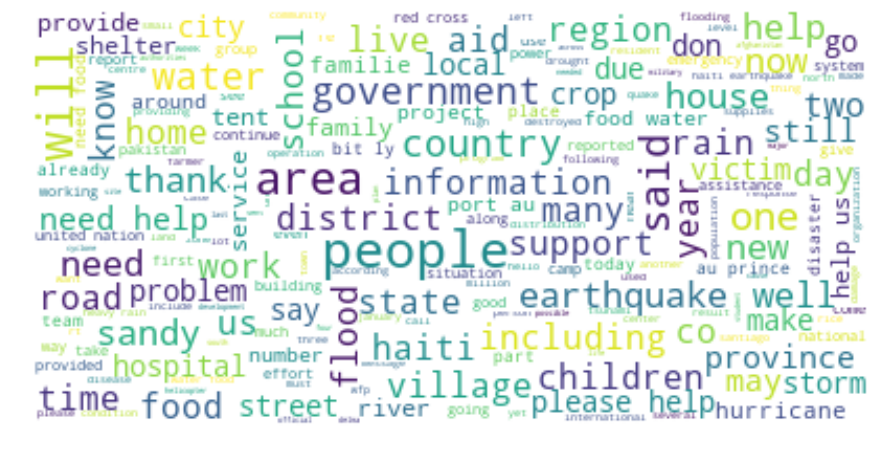

In [33]:
#Plot Word Cloud for messages
words = text_to_plot(df.message)
wordcloud = WordCloud(stopwords = set(STOPWORDS),max_font_size = 25, max_words = 200, background_color='white').generate(words)
plt.figure(figsize=(15,20))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()